In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/yelp_labelled.txt', sep = '\t', header = None)
data.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
column_name = ['Review', 'Sentiment']
data.columns = column_name
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(1000, 2)

In [5]:
data['Sentiment'].value_counts()

,count
Sentiment,
1,500
0,500


We have balanced data set with equal number of positive and negative reviews.

In [7]:
data_amazon = pd.read_csv('/content/amazon_cells_labelled.txt', sep = '\t', header = None)
data_amazon.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
column_name = ['Review', 'Sentiment']
data_amazon.columns = column_name
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
data_amazon['Sentiment'].value_counts()

,count
Sentiment,
0,500
1,500


In [10]:
data_imdb = pd.read_csv('/content/imdb_labelled.txt', sep = '\t', header = None)
data_imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
column_name = ['Review', 'Sentiment']
data_imdb.columns = column_name
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
data_imdb['Sentiment'].value_counts()

,count
Sentiment,
1,386
0,362


In [18]:
df = pd.concat([data, data_amazon, data_imdb], axis= 0,ignore_index = True)
df.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




				 Positive WORDS


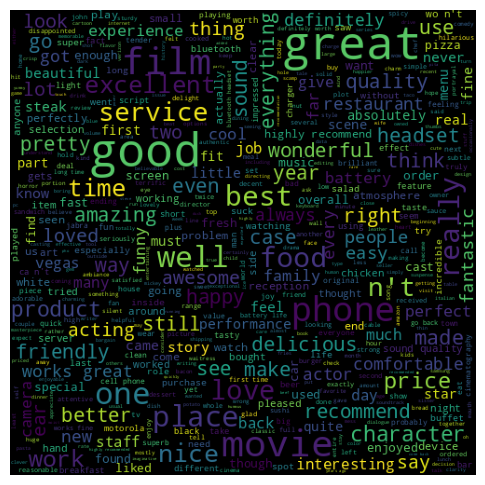

				 Negative WORDS


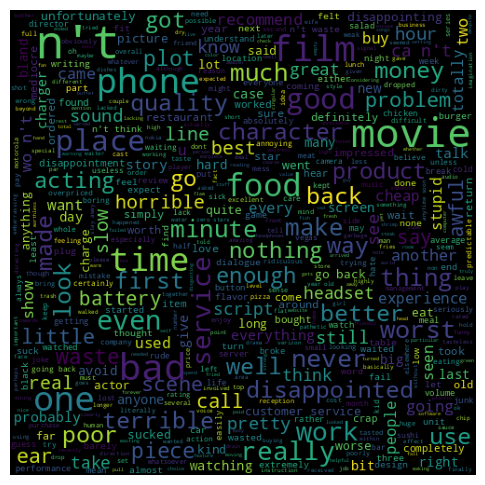

In [118]:
from wordcloud import WordCloud # tag cloud
from wordcloud import STOPWORDS # stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Stopwords (noise words)
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

positive_dataset = df[df.Sentiment == 1]
negative_dataset = df[df.Sentiment == 0]
positive_words = ' '
negative_words = ' '

for words in positive_dataset.Review:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        positive_words = positive_words + word + " "
for words in negative_dataset.Review:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        negative_words = negative_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (5,5))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

print("\n")
print("\t\t\t\t Positive WORDS")
wordcloud = WordCloud(background_color = 'black', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(positive_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Negative WORDS")
wordcloud = WordCloud(background_color = 'black', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(negative_words)
gen_wordcloud(wordcloud)

Data Cleaning

In [19]:
import string
punct = string.punctuation

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)


In [21]:
# creating a function for data cleaning

In [29]:
import spacy
nlp = spacy.load('en_core_web_sm')

def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = []
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens


Vectorization Feature Engineering

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [38]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)


In [53]:
classifier = Pipeline([('tfidf',tfidf),('classifier',LinearSVC())])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size = 0.2, random_state = 42)


In [56]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7e1fbf233be0>)),
                ('classifier', LinearSVC())])

In [57]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       285
           1       0.78      0.74      0.76       265

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



In [59]:
confusion_matrix(y_test, y_pred)

array([[230,  55],
       [ 68, 197]])

In [60]:
accuracy_score(y_test, y_pred)*100

77.63636363636364

- Real time testing

In [62]:
classifier.predict(['Wow, this is amazing movie'])[0]

1

In [66]:
review = 'This book is not satisfactory'
classifier.predict(['This book is not satisfactory'])[0]


1

In [67]:
doc = nlp(review)

tokens = []
for token in doc:
  if token.lemma_ != "-PRON-":
    temp = token.lemma_.lower().strip()
  else:
    temp = token.lower_
  tokens.append(temp)

cleaned_tokens = []
for token in tokens:
  if token not in stopwords and token not in punct:
    cleaned_tokens.append(token)
cleaned_tokens

['book', 'satisfactory']

From above scenario, the word 'not' is eliminated as it is treated as a stopword during the cleaning process, leading the model to classify the sentence as positive.

Negation Handling: modifying text preprocessing to handle negations more effectively. For example, replace phrases like "not good" with "bad" during the cleaning process.

In [89]:
import re

def handle_negations(review):
  # list of negation phrases and their replacements
  negations = {
        r'\bnot good\b': 'bad',
        r'\bnot great\b': 'bad',
        r'\bnot satisfactory\b': 'unsatisfactory',
        r'\bnot happy\b': 'unhappy',
        r'\bnot like\b': 'dislike',

    }

  # Replace negation phrases
  for negation, replacement in negations.items():
      review = re.sub(negation, replacement, review, flags=re.IGNORECASE)

  doc = nlp(review)

  tokens = []
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)

  return cleaned_tokens


In [90]:
tfidf = TfidfVectorizer(tokenizer = handle_negations)
classifier = Pipeline([('tfidf',tfidf),('classifier',LinearSVC())])
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function handle_negations at 0x7e1fb906d2d0>)),
                ('classifier', LinearSVC())])

In [92]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

80.0

Post Negation Handling, observed increase in Accuracy score.


Real time testing
---



In [93]:
review = 'This book is not satisfactory'
classifier.predict([review])[0]


0

In [95]:
review = 'This movie is not good'
classifier.predict([review])[0]

0

In [96]:
review = 'I received my parcel late'
classifier.predict([review])[0]

0

In [97]:
review = "I received my parcel. It's excellent"
classifier.predict([review])[0]

1